In [122]:
!pwd

/Users/mittov/Documents/spb-tf20170205


In [2]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [90]:
from skimage.filters.rank import median
from skimage.morphology import disk

In [225]:
import skimage
import skimage.io
import skimage.filters
import skimage.transform
import skimage.feature
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

In [3]:
%matplotlib inline

In [4]:
from keras.models import load_model

In [5]:
from keras.layers import Dense, Activation, Flatten, Input, Dropout, GlobalAveragePooling2D
from keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D
from keras.models import Model, Sequential

In [6]:
from keras.applications import ResNet50 # resnet50

In [7]:
input_tensor = Input(shape=(224, 224, 3))
resnet = ResNet50(include_top=False, weights='imagenet', input_tensor=input_tensor)

In [8]:
from keras.applications.imagenet_utils import preprocess_input, decode_predictions

In [226]:
%%time
faces = list()
paths = list()
origin_faces = list()
for path in os.listdir('faces/out'):
    paths.append(path)
    img = skimage.io.imread('faces/out/' + path)
    origin_faces.append(img)
    img = skimage.color.rgb2gray(img)
    img = skimage.feature.canny(img, sigma=2)
    img = skimage.color.gray2rgb(img)
    faces.append(img)
data = np.array(faces).astype(np.float64)
data = preprocess_input(data)
faces_len = len(data)
prediction_faces = resnet.predict(data).reshape(faces_len, 2048)

CPU times: user 4min 30s, sys: 23.2 s, total: 4min 54s
Wall time: 1min 29s


In [227]:
%%time
pokemons = list()
origin_pokemons = list()
pokepaths = list()
dir_ = 'pokefaces'
for path in os.listdir(dir_):
    path = os.path.join(dir_, path)
    if '.png' not in path:
        continue
#     if '_' in path:
#         print path
#         continue
    pokepaths.append(path)
    pokeimg = skimage.io.imread(path)
    pokeimg = skimage.transform.resize(pokeimg, (224, 224, 3))
    origin_pokemons.append(pokeimg)
#     pokeimg[:, :, 0] = median(pokeimg[:, :, 0], disk(4))
#     pokeimg[:, :, 1] = median(pokeimg[:, :, 1], disk(4))
#     pokeimg[:, :, 2] = median(pokeimg[:, :, 2], disk(4))

    pokeimg = skimage.color.rgb2gray(pokeimg)
    pokeimg = skimage.feature.canny(pokeimg, sigma=2)
    pokeimg = skimage.color.gray2rgb(pokeimg)
    pokemons.append(pokeimg)
data = np.array(pokemons).astype(np.float64)
data = preprocess_input(data)
poke_len = len(data)
prediction_poke = resnet.predict(data).reshape(poke_len, 2048)

CPU times: user 44 s, sys: 3.74 s, total: 47.7 s
Wall time: 14.6 s


In [228]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1, metric='manhattan', algorithm='brute', leaf_size=1)
neigh.fit(prediction_poke, np.arange(poke_len)) 

KNeighborsClassifier(algorithm='brute', leaf_size=1, metric='manhattan',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [229]:
predicted = neigh.predict(prediction_faces)

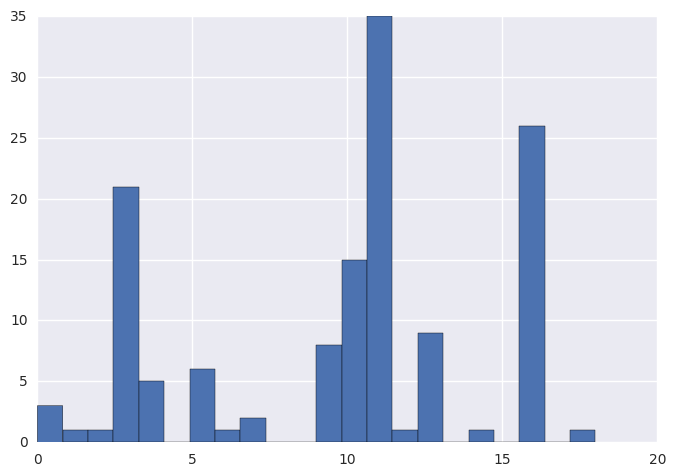

In [230]:
hist = plt.hist(predicted, bins=poke_len)

In [231]:
np.argmax(hist[0])

13

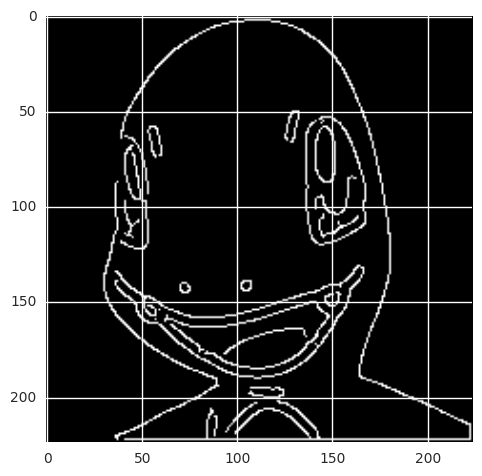

In [232]:
plt.imshow(pokemons[0])
plt.show()

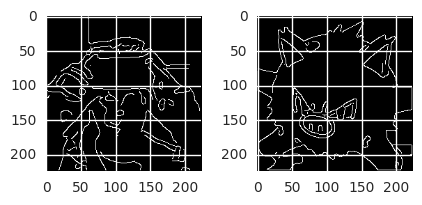

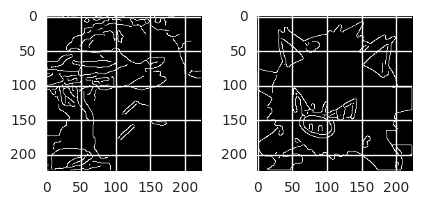

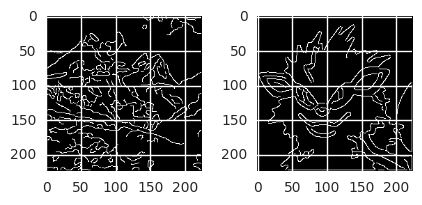

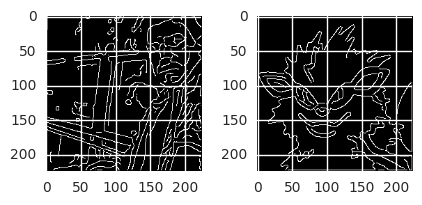

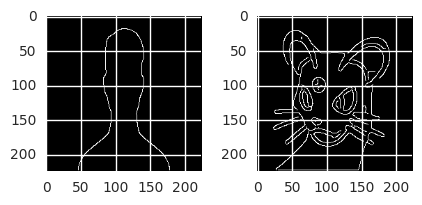

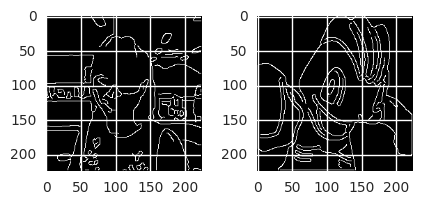

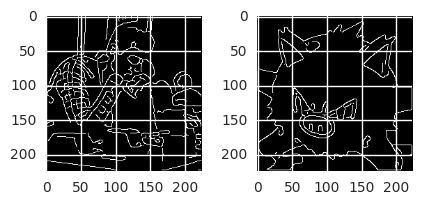

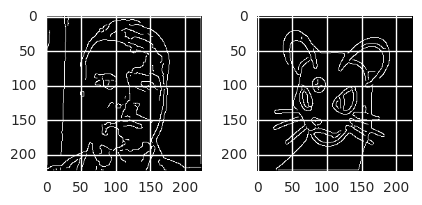

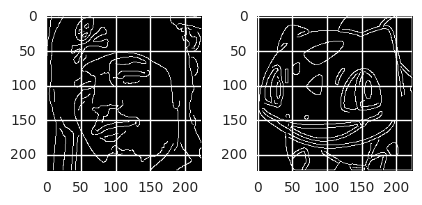

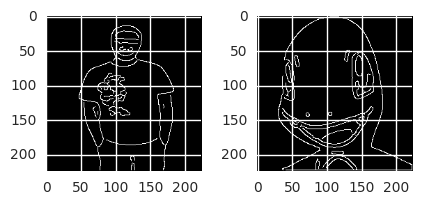

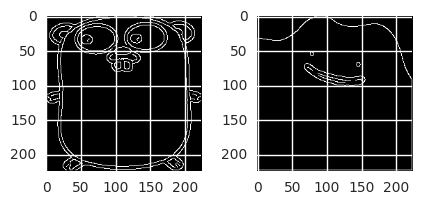

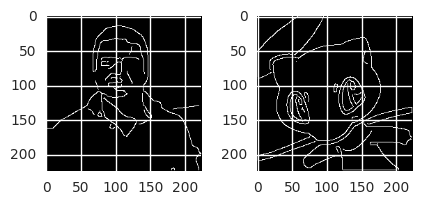

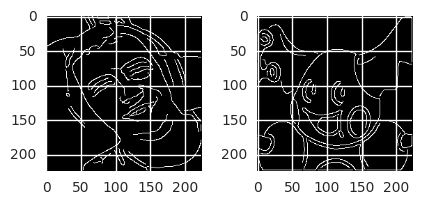

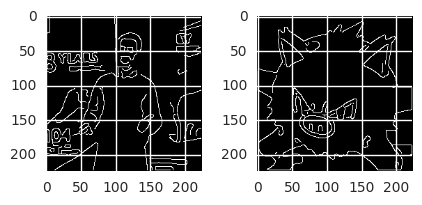

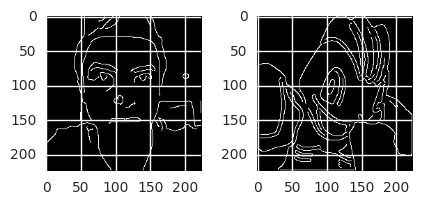

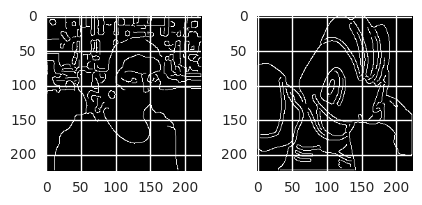

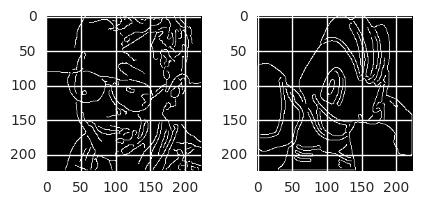

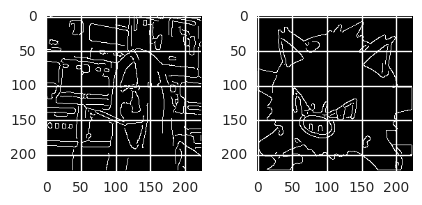

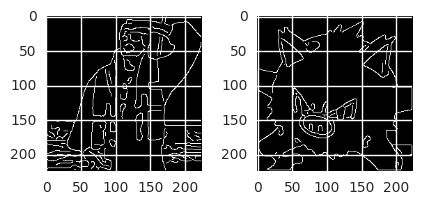

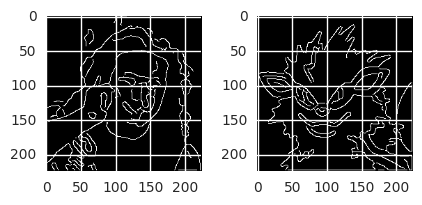

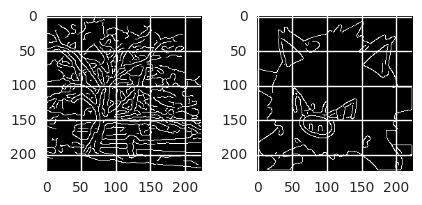

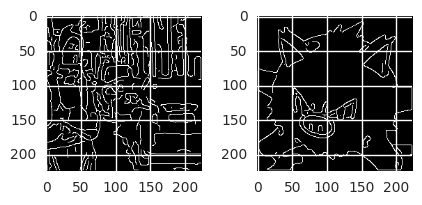

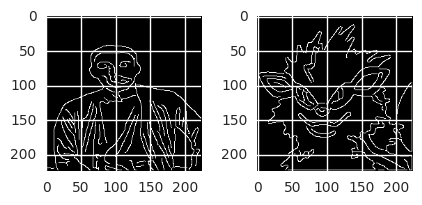

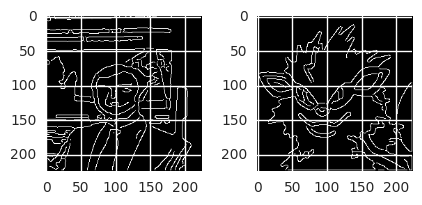

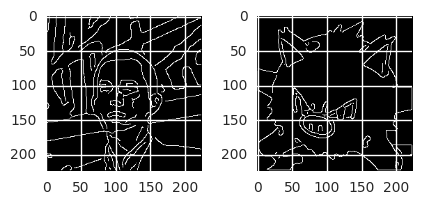

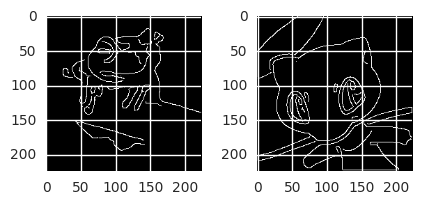

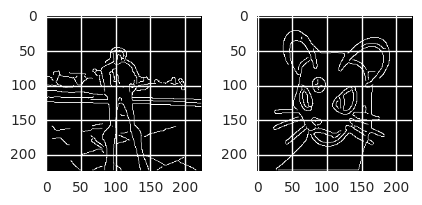

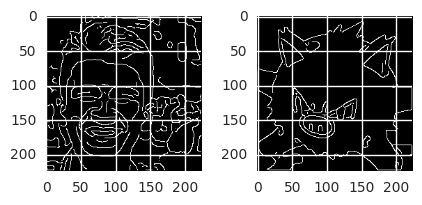

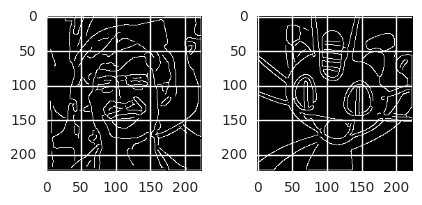

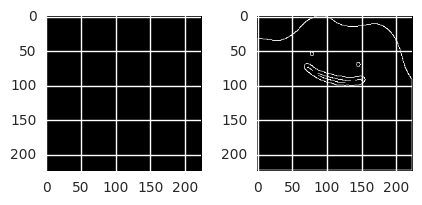

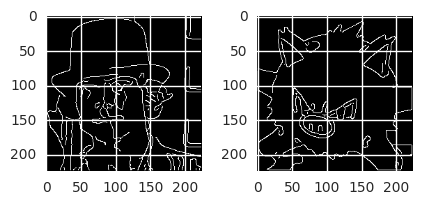

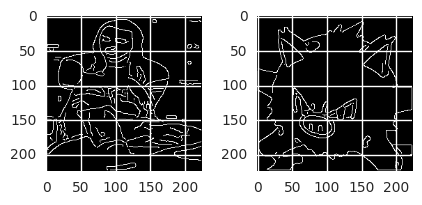

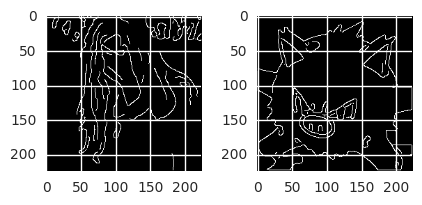

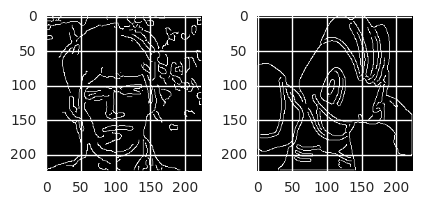

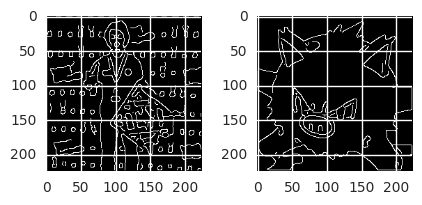

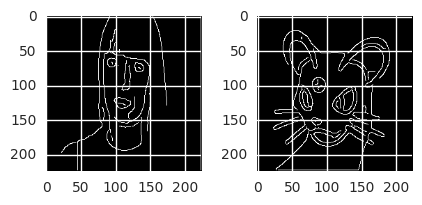

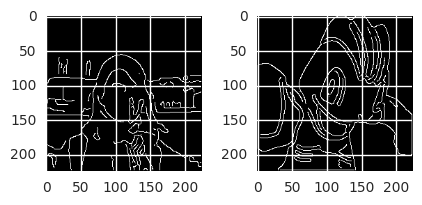

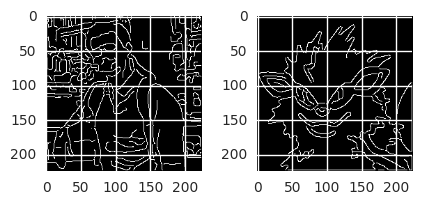

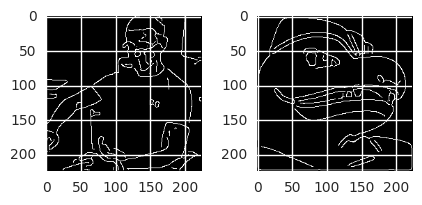

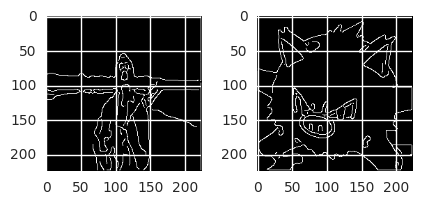

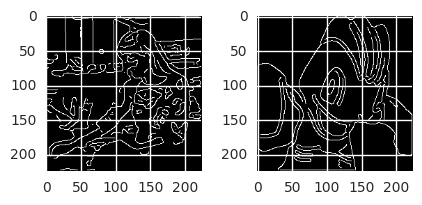

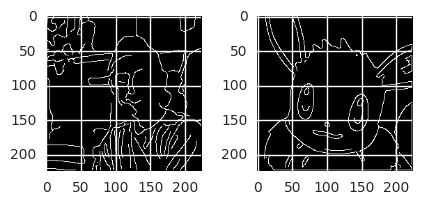

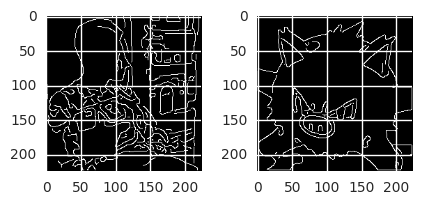

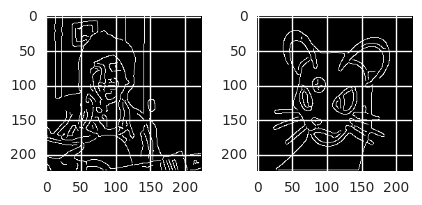

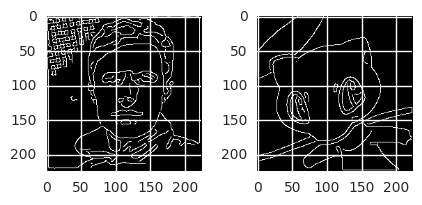

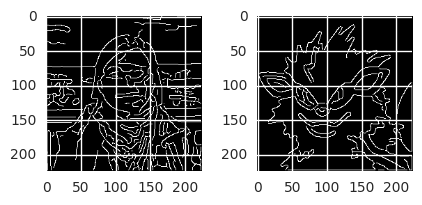

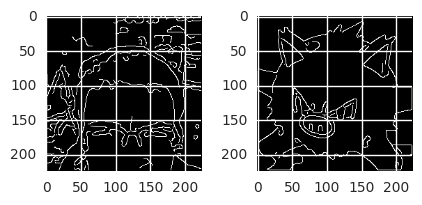

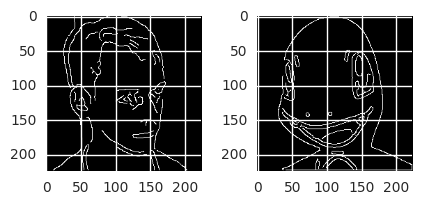

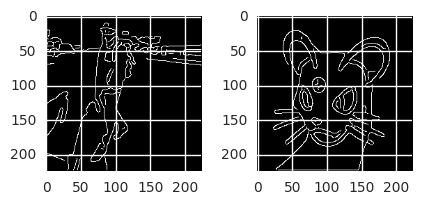

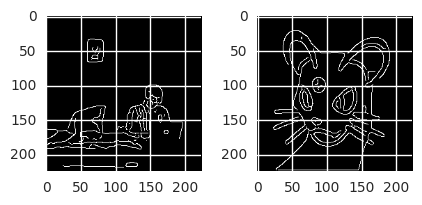

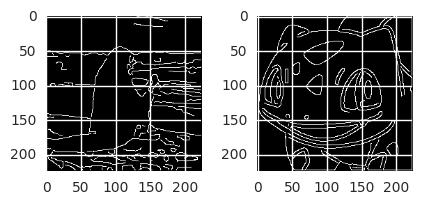

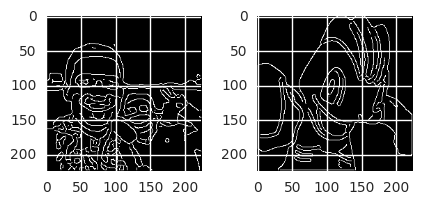

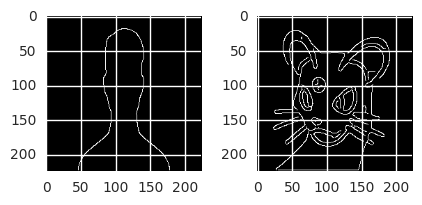

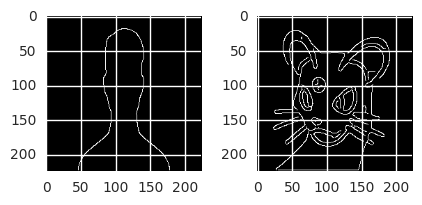

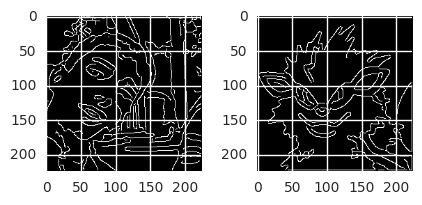

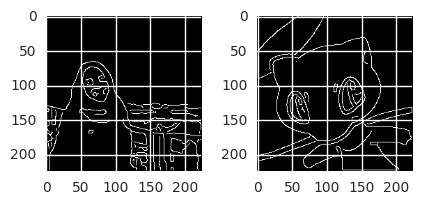

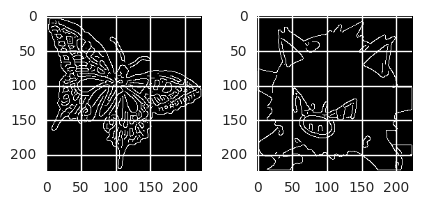

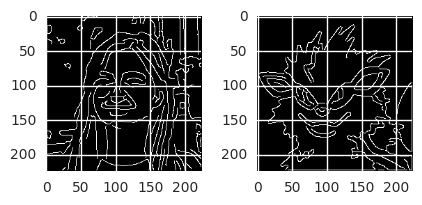

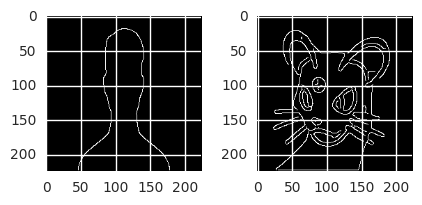

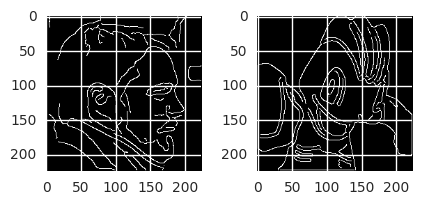

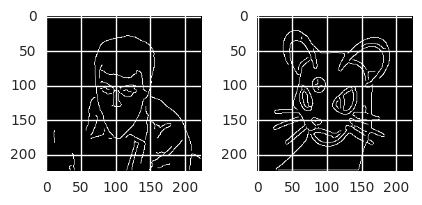

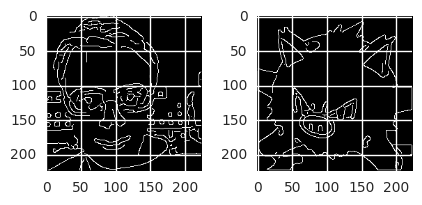

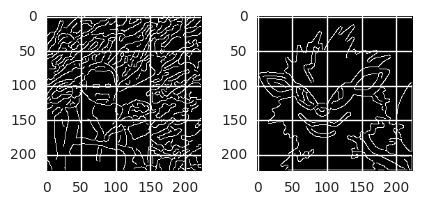

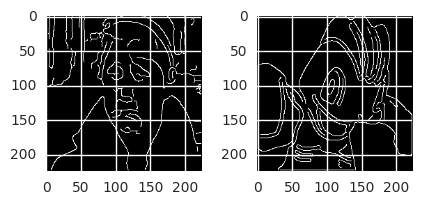

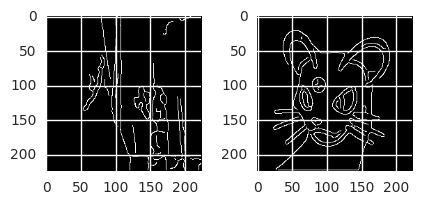

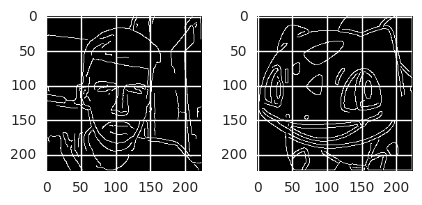

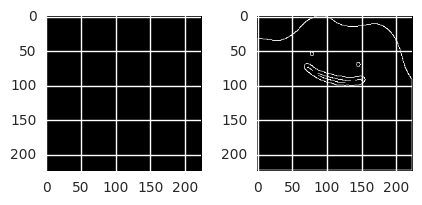

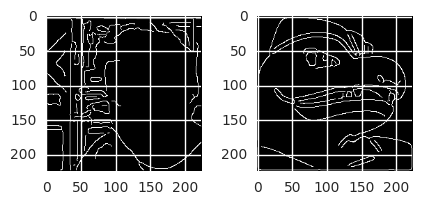

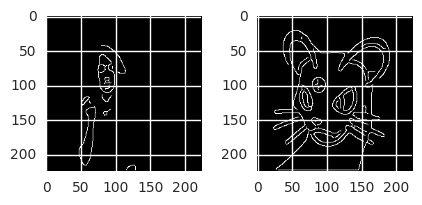

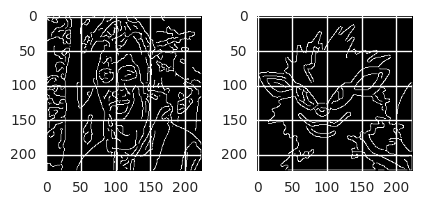

In [233]:
for idx in range(70):
    plt.figure(figsize=(5, 2))
    plt.subplot(121)
    plt.imshow(faces[idx])
    plt.subplot(122)
    plt.imshow(pokemons[predicted[idx]])
    plt.show()

In [77]:
np.argmax(hist[0])

87

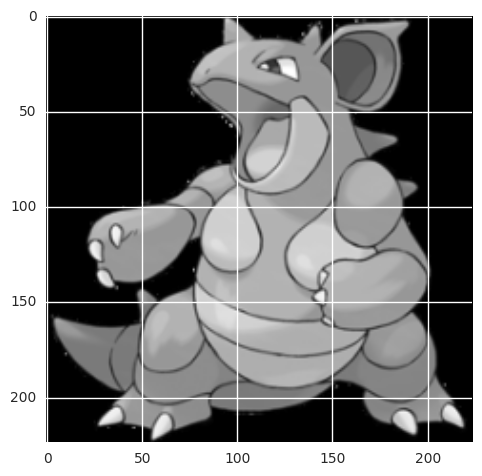

In [78]:
plt.imshow(pokemons[87])

In [65]:
np.where(hist[0] == 18)

(array([21]),)

In [37]:
np.dot(prediction_faces[0], prediction_poke[0]) / sla.norm(prediction_faces[0]) / sla.norm(prediction_poke[0])

0.97896838

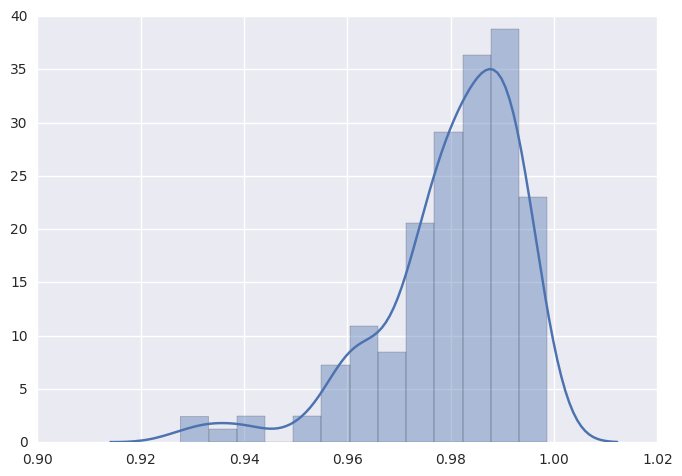

In [39]:
pface = prediction_faces[0]
faces_dist = []
for face in prediction_poke:
    dist = np.dot(pface, face) / sla.norm(pface) / sla.norm(face)
    faces_dist.append(dist)
sns.distplot(faces_dist)

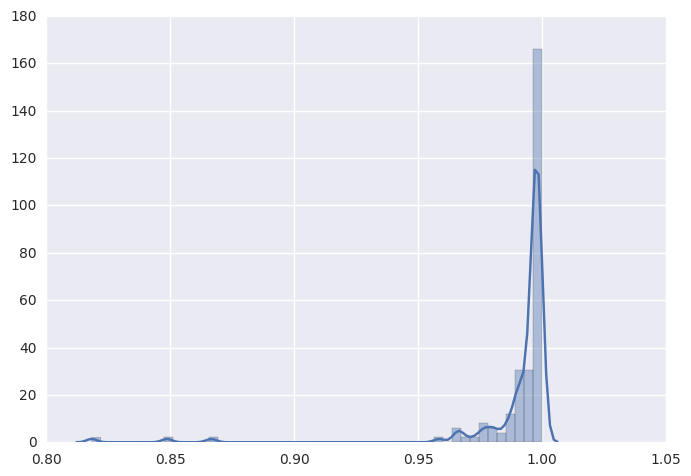

In [40]:
pface = prediction_faces[0]
faces_dist = []
for face in prediction_faces:
    dist = np.dot(pface, face) / sla.norm(pface) / sla.norm(face)
    faces_dist.append(dist)
sns.distplot(faces_dist)

In [25]:
import seaborn as sns

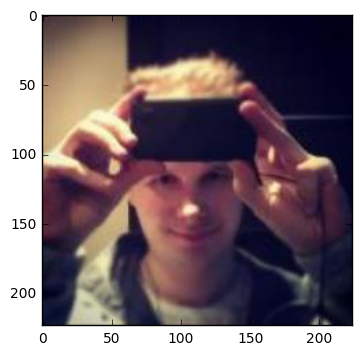

In [18]:
plt.imshow(faces[0])

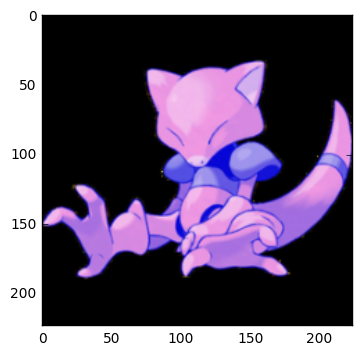

In [22]:
plt.imshow(pokemons[0])

NameError: name 'pokepredictions' is not defined

In [ ]:
fig, ax = plt.subplots(10, 1, figsize=(13, 80))
for idx, perplexity in enumerate(np.logspace(0, 2, 10)):
    compressor = TSNE(n_components=2, perplexity=perplexity)
    compressed = compressor.fit_transform(descriptors)
    ax[idx].scatter(compressed[:151, 0], compressed[:151, 1], color='blue')
    ax[idx].scatter(compressed[151:, 0], compressed[151:, 1], color='red')

In [47]:
%%time
compressor = TSNE(n_components=2)
compressed = compressor.fit_transform(hpredictions)

CPU times: user 848 ms, sys: 83.4 ms, total: 932 ms
Wall time: 952 ms


In [59]:
%%time
compressor = TSNE(n_components=2)
pokecompressed = compressor.fit_transform(pokepredictions)

CPU times: user 1.14 s, sys: 115 ms, total: 1.26 s
Wall time: 1.28 s


In [68]:
pokepredictions.shape, hpredictions.shape

((151, 2048), (136, 2048))

In [71]:
descriptors = np.concatenate([pokepredictions, hpredictions])

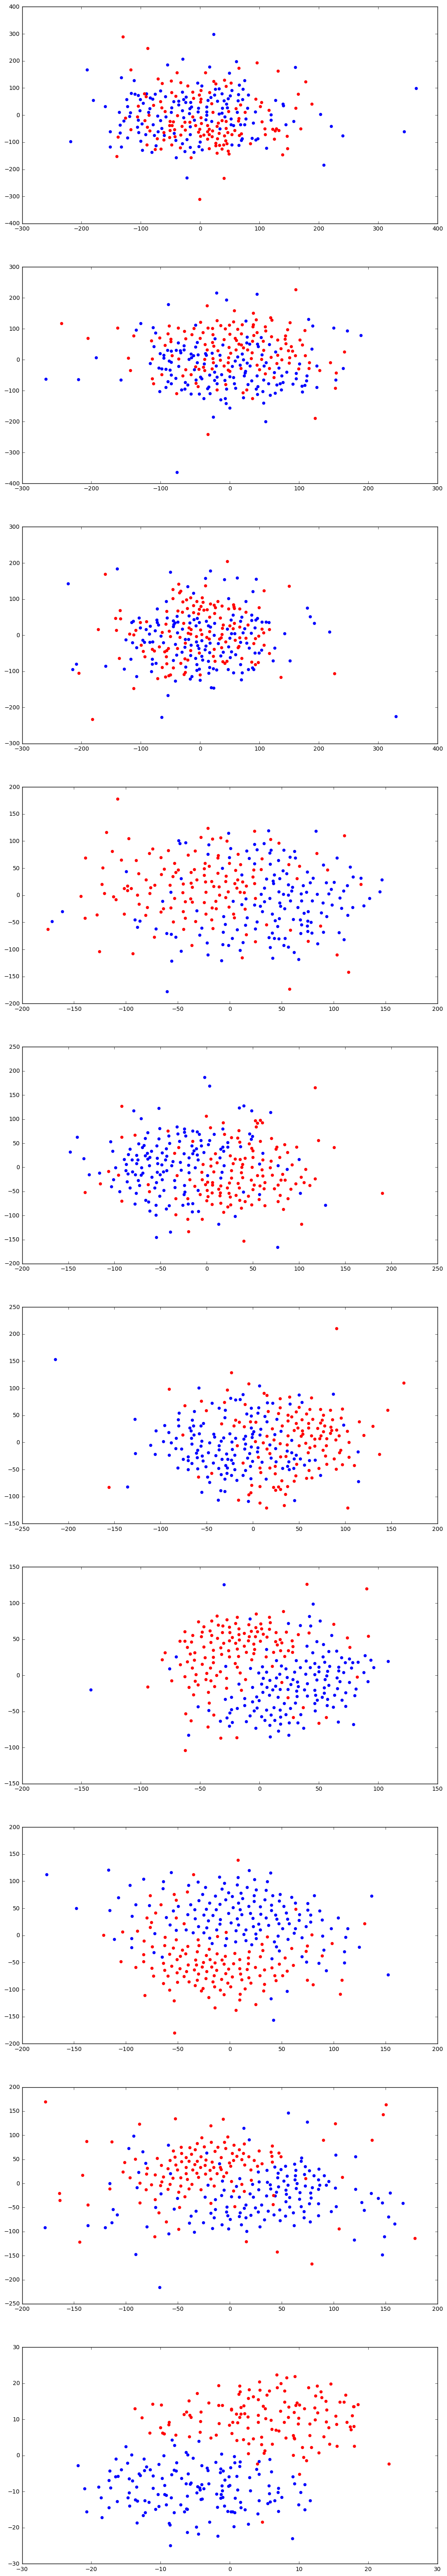

In [77]:
fig, ax = plt.subplots(10, 1, figsize=(13, 80))
for idx, perplexity in enumerate(np.logspace(0, 2, 10)):
    compressor = TSNE(n_components=2, perplexity=perplexity)
    compressed = compressor.fit_transform(descriptors)
    ax[idx].scatter(compressed[:151, 0], compressed[:151, 1], color='blue')
    ax[idx].scatter(compressed[151:, 0], compressed[151:, 1], color='red')

In [60]:
pokecompressed.shape

(151, 2)

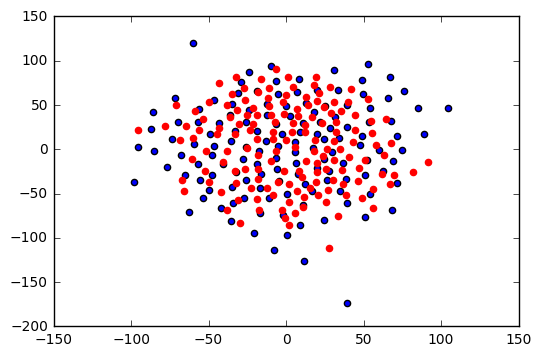

In [62]:
plt.scatter(compressed[:, 0], compressed[:, 1])
plt.scatter(pokecompressed[:, 0], pokecompressed[:, 1], color='red')

In [54]:
!ls

Abra.png                Horsea.png              Poliwhirl.png
Aerodactyl.png          Hypno.png               Poliwrath.png
Alakazam.png            Icon?                   Ponyta.png
Arbok.png               Ivysaur.png             Porygon.png
Arcanine.png            Jigglypuff.png          Primeape.png
Articuno.png            Jolteon.png             Psyduck.png
Beedrill.png            Jynx.png                README.md
Bellsprout.png          Kabuto.png              Raichu.png
Blastoise.png           Kabutops.png            Rapidash.png
Bulbasaur.png           Kadabra.png             Raticate.png
Butterfree.png          Kakuna.png              Rattata.png
Caterpie.png            Kangaskhan.png          Rhydon.png
Chansey.png             Kingler.png             Rhyhorn.png
Charizard.png           Koffing.png             Sandshrew.png
Charmander.png          Krabby.png              Sandslash.png
Charmeleon.png          LICENSE                 Scyther.png
Clefable.png            Lapras.png

In [56]:
%%time
pokemons = list()
pokepaths = list()
for path in os.listdir('.'):
    if '.png' not in path:
        continue
    pokepaths.append(path)
    pokeimg = skimage.io.imread(path)
    pokeimg = skimage.transform.resize(pokeimg, (224, 224, 3))
    pokemons.append(pokeimg)
data = np.array(pokemons)
pokepredictions = resnet.predict(data)

CPU times: user 5min 1s, sys: 25.3 s, total: 5min 26s
Wall time: 1min 40s


In [58]:
pokepredictions = pokepredictions.reshape(151, 2048)
pokepredictions.shape

(151, 2048)